# FLIGHT PRICE PREDICTION PROJECT

Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)                       
                                       
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

Business Goal:

This project aims to predict ticket prices for upcoming flights to help customers in selecting the optimum time for travel and the cheapest flight to the desired destination. 


In [102]:
import pandas as pd
import numpy as np
df=pd.read_csv("Flight_Prices(web scraping).csv")

In [103]:
df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,Vistara,14:20,16:30,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,"5,955"
1,Vistara,15:30,17:40,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,"5,955"
2,Vistara,21:40,23:50,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,"5,955"
3,Vistara,19:50,22:00,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,"6,060"
4,Vistara,09:30,11:35,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,"6,375"
...,...,...,...,...,...,...,...,...,...
3350,Air Asia,19:35,21:15,25h 40m,Jaipur,Mumbai,Free Meal,1 Stop,"9,311"
3351,Air Asia,05:15,10:25,5h 10m,Jaipur,Chennai,eCash 250,1 Stop,"10,676"
3352,Air Asia,14:20,20:25,6h 05m,Jaipur,Chennai,eCash 250,1 Stop,"10,676"
3353,Air Asia,05:15,12:00,6h 45m,Jaipur,Chennai,eCash 250,1 Stop,"10,676"


In [104]:
#showin all the columns of the DataFrame
df.columns

Index(['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source',
       'Destination', 'Meal_availability', 'Number_of_stops', 'Price'],
      dtype='object')

# Exploretory Data Analysis(EDA)

In [105]:
#import visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [106]:
#checkig shape of the Dataframe
df.shape

(3355, 9)

our dataframe has 3355 rows and 9 columns.It means we have 3355 flight's 9type of data.

In [107]:
#Checking null values
df.isnull().sum()

Airline              0
Departure_time       0
Time_of_arrival      0
Duration             0
Source               0
Destination          0
Meal_availability    0
Number_of_stops      0
Price                0
dtype: int64

we can see there is no missing value 

In [108]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            3355 non-null   object
 1   Departure_time     3355 non-null   object
 2   Time_of_arrival    3355 non-null   object
 3   Duration           3355 non-null   object
 4   Source             3355 non-null   object
 5   Destination        3355 non-null   object
 6   Meal_availability  3355 non-null   object
 7   Number_of_stops    3355 non-null   object
 8   Price              3355 non-null   object
dtypes: object(9)
memory usage: 236.0+ KB


In [109]:
#we change the data type of price object to float
df["Price"]=df['Price'].str.replace(',','')
df["Price"]=df["Price"].astype(float)

In [110]:
df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,Vistara,14:20,16:30,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955.0
1,Vistara,15:30,17:40,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955.0
2,Vistara,21:40,23:50,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955.0
3,Vistara,19:50,22:00,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,6060.0
4,Vistara,09:30,11:35,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,6375.0
...,...,...,...,...,...,...,...,...,...
3350,Air Asia,19:35,21:15,25h 40m,Jaipur,Mumbai,Free Meal,1 Stop,9311.0
3351,Air Asia,05:15,10:25,5h 10m,Jaipur,Chennai,eCash 250,1 Stop,10676.0
3352,Air Asia,14:20,20:25,6h 05m,Jaipur,Chennai,eCash 250,1 Stop,10676.0
3353,Air Asia,05:15,12:00,6h 45m,Jaipur,Chennai,eCash 250,1 Stop,10676.0


<AxesSubplot:>

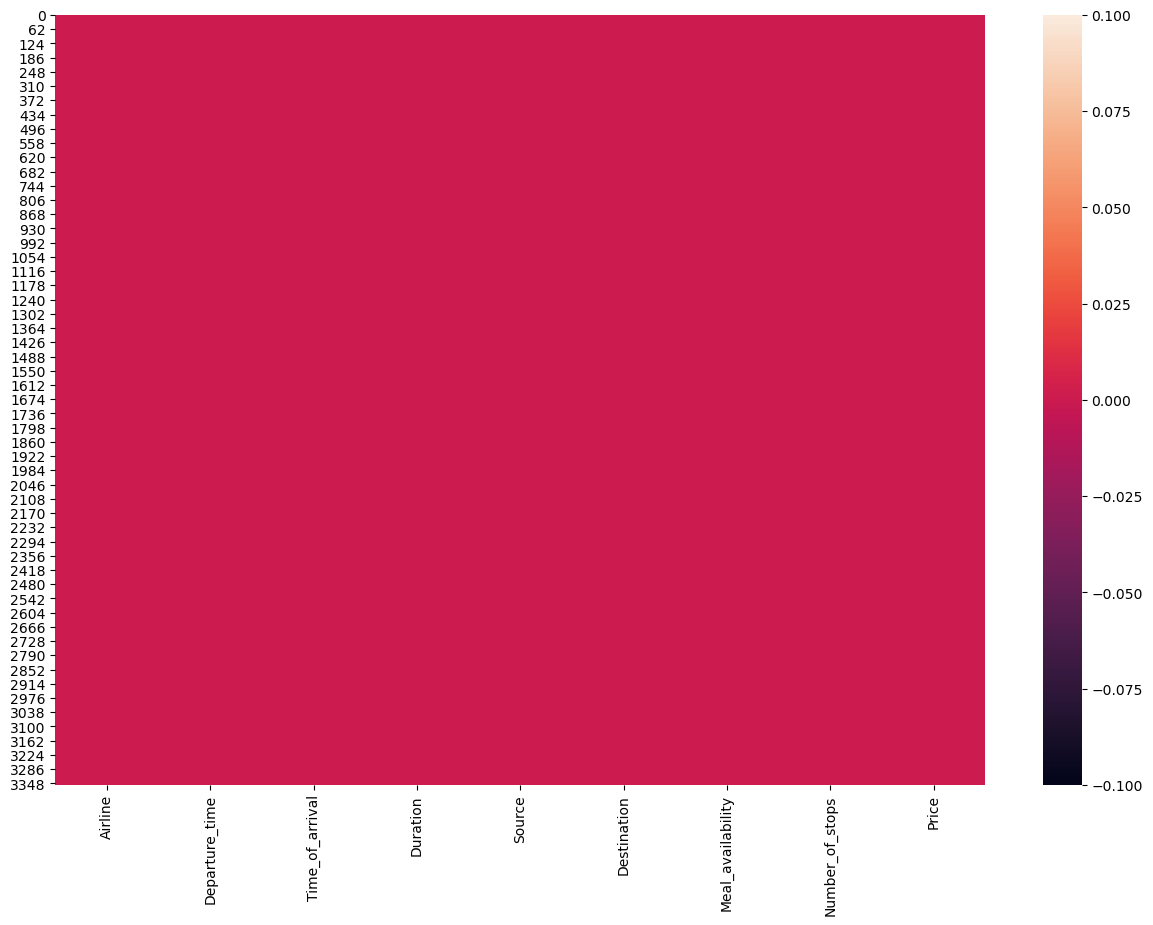

In [111]:
#Checking missing value using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

we are free from missing values.So, this scraping data will be good for model building.

In [112]:
#percentage of missing values
(df.isnull().sum()/1168*100).sort_values(ascending=False)

Airline              0.0
Departure_time       0.0
Time_of_arrival      0.0
Duration             0.0
Source               0.0
Destination          0.0
Meal_availability    0.0
Number_of_stops      0.0
Price                0.0
dtype: float64

In [113]:
#Describing the Dataset
df.describe()

,Price
count,3355.000000
mean,9954.239046
std,3440.176400
min,3361.000000
25%,7425.000000
50%,9776.000000
75%,12389.000000
max,25024.000000


In [114]:
#we have only one numerical column,which is price

Now we divide all the columns into categorical and numerical types

In [115]:
df.dtypes.index

Index(['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source',
       'Destination', 'Meal_availability', 'Number_of_stops', 'Price'],
      dtype='object')

In [116]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source', 'Destination', 'Meal_availability', 'Number_of_stops']
[0, 1, 2, 3, 4, 5, 6, 7]


In [117]:
len(categorical_columns)

8

In [118]:
#8 columns data are string type

In [119]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Price']
[8]


In [120]:
len(numerical_columns)

1

In [121]:
#1 columns data are numeric type

# Univariate Analysis Of Categorical Columns:

column Name: Airline


Air India    1297
IndiGo        810
Vistara       808
Go First      211
SpiceJet      157
Air Asia       70
StarAir         2
Name: Airline, dtype: int64
len= 7


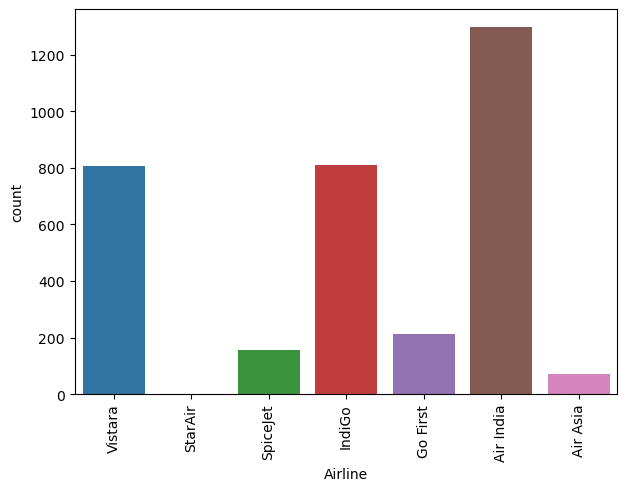



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Departure_time


14:00    87
09:55    69
10:45    66
13:20    64
20:30    56
         ..
18:25     1
03:45     1
23:10     1
19:15     1
18:20     1
Name: Departure_time, Length: 225, dtype: int64
len= 225


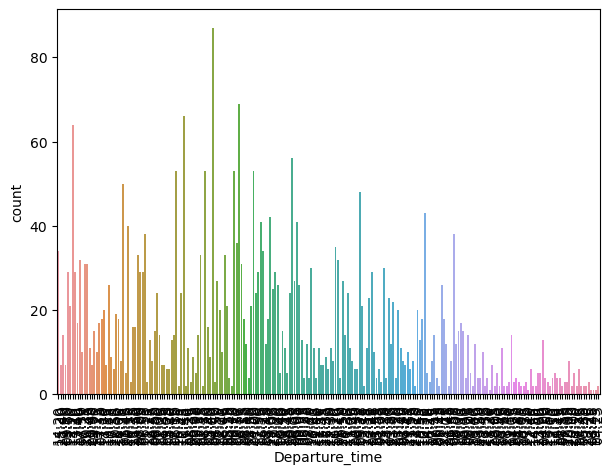



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Time_of_arrival


19:40    79
20:45    75
20:00    66
14:00    62
19:55    58
         ..
16:50     1
21:10     1
03:45     1
19:45     1
06:35     1
Name: Time_of_arrival, Length: 235, dtype: int64
len= 235


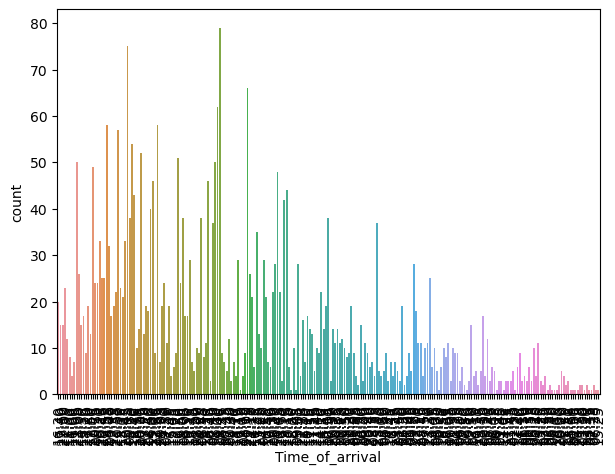



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Duration


2h 10m     38
2h 15m     31
1h 10m     30
2h 45m     30
8h 50m     24
           ..
35h 20m     1
11h 49m     1
34h 35m     1
36h 05m     1
34h 55m     1
Name: Duration, Length: 404, dtype: int64
len= 404


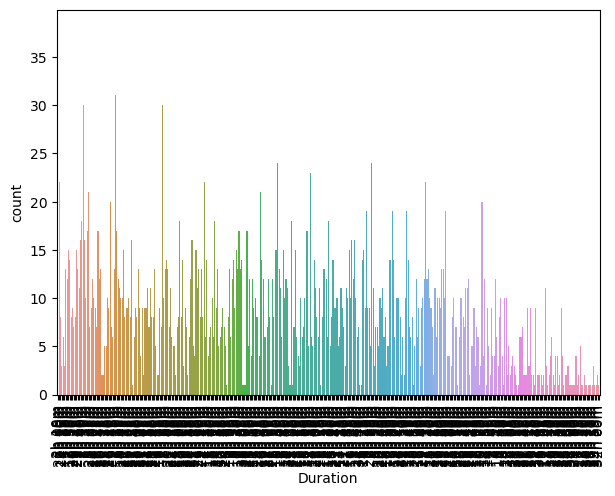



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Source


New Delhi    481
Chennai      463
Mumbai       460
Bangalore    458
Hyderabad    421
Kolkata      375
Goa          297
Jaipur       226
Lucknow      174
Name: Source, dtype: int64
len= 9


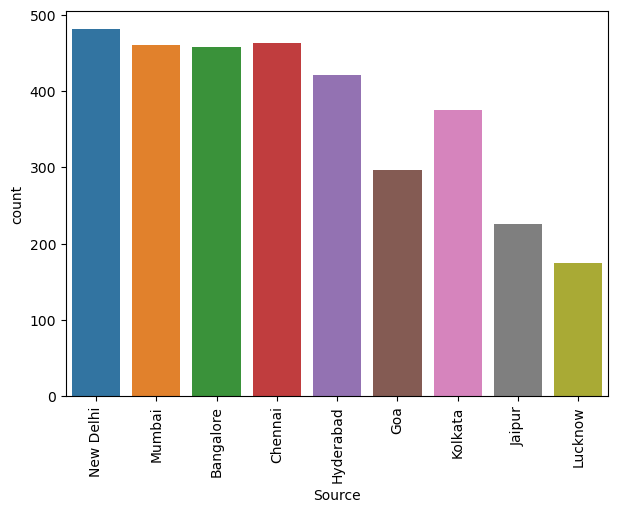



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Destination


Mumbai       517
Lucknow      448
Chennai      430
Hyderabad    409
Bangalore    380
Goa          348
Kolkata      322
New Delhi    279
Jaipur       222
Name: Destination, dtype: int64
len= 9


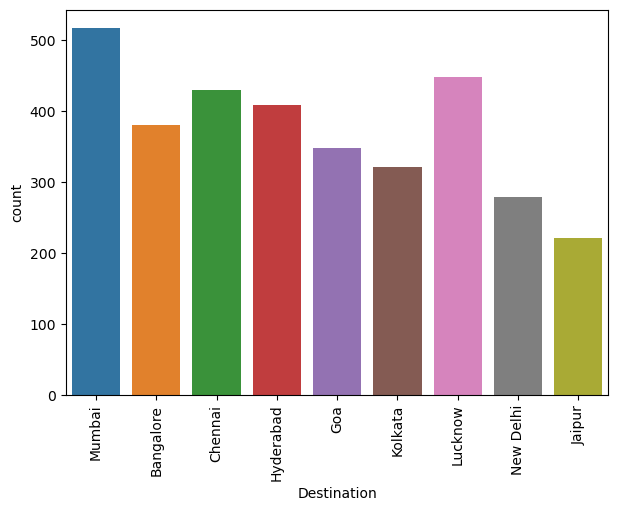



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Meal_availability


Free Meal       1455
eCash 250       1222
No Meal Fare     653
None              25
Name: Meal_availability, dtype: int64
len= 4


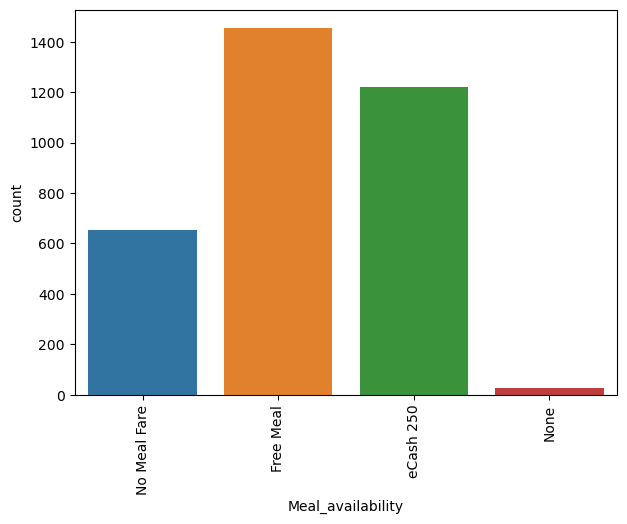



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Number_of_stops


1 Stop       1832
2 Stop(s)     936
Non Stop      432
3 Stop(s)     148
4 Stop(s)       7
Name: Number_of_stops, dtype: int64
len= 5


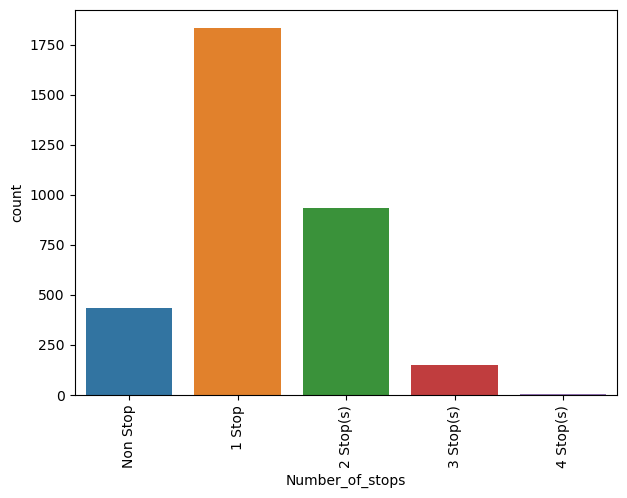



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------




In [122]:
for i in index_c:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(7,5))
    sns.countplot(df[df.columns[i]])
    plt.xticks(rotation=90)
    plt.show()
    print('\n')
    print("-"*125)
    print('\n')
    print("-"*125)
    print('\n')

In [123]:
# converting Departure_time and Time_of_arrival columns from object type to Datetime type
df["Departure_time"] = pd.to_datetime(df["Departure_time"])
df["Time_of_arrival"] = pd.to_datetime(df["Time_of_arrival"])

In [124]:
# extracting hour from Departure_time column
df["Departure_time(hour)"] =df['Departure_time'].dt.hour

In [125]:
# extracting hour from Time_of_arrival column
df["Time_of_arrival(hour)"] =df['Time_of_arrival'].dt.hour

In [126]:
df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_time(hour),Time_of_arrival(hour)
0,Vistara,2022-07-26 14:20:00,2022-07-26 16:30:00,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955.0,14,16
1,Vistara,2022-07-26 15:30:00,2022-07-26 17:40:00,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955.0,15,17
2,Vistara,2022-07-26 21:40:00,2022-07-26 23:50:00,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,5955.0,21,23
3,Vistara,2022-07-26 19:50:00,2022-07-26 22:00:00,2h 10m,New Delhi,Mumbai,No Meal Fare,Non Stop,6060.0,19,22
4,Vistara,2022-07-26 09:30:00,2022-07-26 11:35:00,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,6375.0,9,11
...,...,...,...,...,...,...,...,...,...,...,...
3350,Air Asia,2022-07-26 19:35:00,2022-07-26 21:15:00,25h 40m,Jaipur,Mumbai,Free Meal,1 Stop,9311.0,19,21
3351,Air Asia,2022-07-26 05:15:00,2022-07-26 10:25:00,5h 10m,Jaipur,Chennai,eCash 250,1 Stop,10676.0,5,10
3352,Air Asia,2022-07-26 14:20:00,2022-07-26 20:25:00,6h 05m,Jaipur,Chennai,eCash 250,1 Stop,10676.0,14,20
3353,Air Asia,2022-07-26 05:15:00,2022-07-26 12:00:00,6h 45m,Jaipur,Chennai,eCash 250,1 Stop,10676.0,5,12


In [127]:
# replacing "eCash250" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')


# grouping the entries with same meaning
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

In [128]:
df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_time(hour),Time_of_arrival(hour)
0,Vistara,2022-07-26 14:20:00,2022-07-26 16:30:00,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,14,16
1,Vistara,2022-07-26 15:30:00,2022-07-26 17:40:00,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,15,17
2,Vistara,2022-07-26 21:40:00,2022-07-26 23:50:00,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,21,23
3,Vistara,2022-07-26 19:50:00,2022-07-26 22:00:00,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,6060.0,19,22
4,Vistara,2022-07-26 09:30:00,2022-07-26 11:35:00,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,6375.0,9,11
...,...,...,...,...,...,...,...,...,...,...,...
3350,Air Asia,2022-07-26 19:35:00,2022-07-26 21:15:00,25h 40m,Jaipur,Mumbai,Free Meal,1 Stop,9311.0,19,21
3351,Air Asia,2022-07-26 05:15:00,2022-07-26 10:25:00,5h 10m,Jaipur,Chennai,None,1 Stop,10676.0,5,10
3352,Air Asia,2022-07-26 14:20:00,2022-07-26 20:25:00,6h 05m,Jaipur,Chennai,None,1 Stop,10676.0,14,20
3353,Air Asia,2022-07-26 05:15:00,2022-07-26 12:00:00,6h 45m,Jaipur,Chennai,None,1 Stop,10676.0,5,12


In [129]:
df["Duration"]=df["Duration"].str.replace("m",'')

In [130]:
p=[]
for i in range(0,3355):
    x=df["Duration"][i].split('h ')[0]
    y=df["Duration"][i].split('h ')[1]
    m=(int(x))*60 +int(y)
    p.append(m)

In [131]:
df["Duration"]=p

In [132]:
df

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_time(hour),Time_of_arrival(hour)
0,Vistara,2022-07-26 14:20:00,2022-07-26 16:30:00,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,14,16
1,Vistara,2022-07-26 15:30:00,2022-07-26 17:40:00,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,15,17
2,Vistara,2022-07-26 21:40:00,2022-07-26 23:50:00,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,21,23
3,Vistara,2022-07-26 19:50:00,2022-07-26 22:00:00,130,New Delhi,Mumbai,Free Meal,Non Stop,6060.0,19,22
4,Vistara,2022-07-26 09:30:00,2022-07-26 11:35:00,125,New Delhi,Mumbai,Free Meal,Non Stop,6375.0,9,11
...,...,...,...,...,...,...,...,...,...,...,...
3350,Air Asia,2022-07-26 19:35:00,2022-07-26 21:15:00,1540,Jaipur,Mumbai,Free Meal,1 Stop,9311.0,19,21
3351,Air Asia,2022-07-26 05:15:00,2022-07-26 10:25:00,310,Jaipur,Chennai,None,1 Stop,10676.0,5,10
3352,Air Asia,2022-07-26 14:20:00,2022-07-26 20:25:00,365,Jaipur,Chennai,None,1 Stop,10676.0,14,20
3353,Air Asia,2022-07-26 05:15:00,2022-07-26 12:00:00,405,Jaipur,Chennai,None,1 Stop,10676.0,5,12


In [133]:
#Now we drop Departure_time and Time_of_arrival column
df=df.drop(['Time_of_arrival','Departure_time'],axis=1)

In [134]:
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_time(hour),Time_of_arrival(hour)
0,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,14,16
1,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,15,17
2,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,21,23
3,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,6060.0,19,22
4,Vistara,125,New Delhi,Mumbai,Free Meal,Non Stop,6375.0,9,11
...,...,...,...,...,...,...,...,...,...
3350,Air Asia,1540,Jaipur,Mumbai,Free Meal,1 Stop,9311.0,19,21
3351,Air Asia,310,Jaipur,Chennai,None,1 Stop,10676.0,5,10
3352,Air Asia,365,Jaipur,Chennai,None,1 Stop,10676.0,14,20
3353,Air Asia,405,Jaipur,Chennai,None,1 Stop,10676.0,5,12


In [135]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Duration', 'Price', 'Departure_time(hour)', 'Time_of_arrival(hour)']
[1, 6, 7, 8]


column Name: Duration


130     38
135     31
70      30
165     30
500     24
        ..
2320     1
2380     1
491      1
709      1
2070     1
Name: Duration, Length: 404, dtype: int64
len= 404


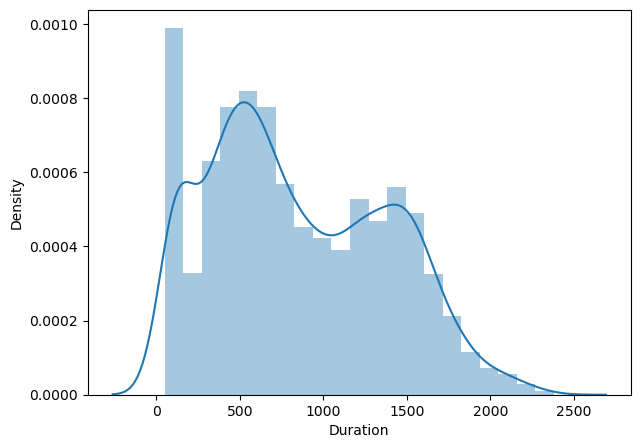



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Price


7425.0     71
5955.0     51
9840.0     50
14249.0    47
6489.0     45
           ..
7468.0      1
9535.0      1
11217.0     1
5773.0      1
9780.0      1
Name: Price, Length: 819, dtype: int64
len= 819


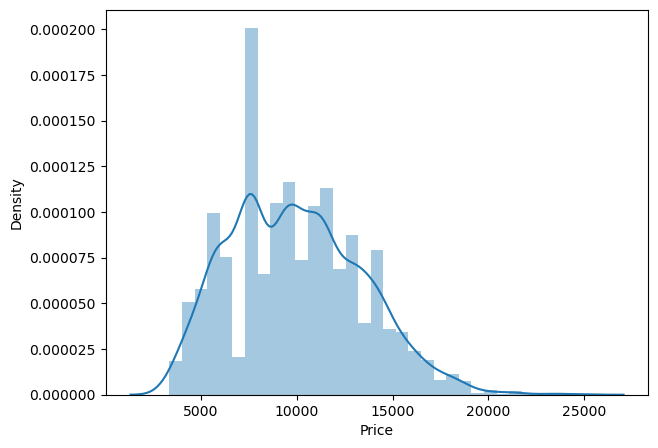



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Departure_time(hour)


6     335
9     248
13    226
20    223
14    220
10    213
8     205
17    202
12    189
11    183
19    178
21    170
7     126
18    126
16    124
15    120
5      72
22     68
23     65
1      18
4      17
2      15
0       7
3       5
Name: Departure_time(hour), dtype: int64
len= 24


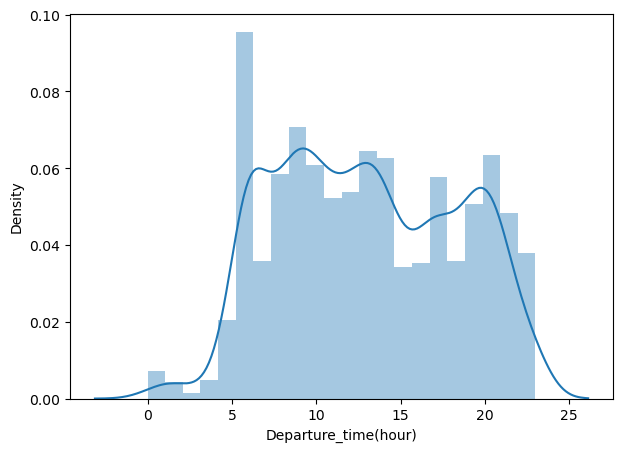



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Time_of_arrival(hour)


20    371
19    314
23    252
14    249
16    206
22    193
18    185
17    173
9     173
8     170
12    161
10    161
21    140
13    134
7     120
11     95
15     87
6      61
0      49
1      27
5      15
2      12
3       6
4       1
Name: Time_of_arrival(hour), dtype: int64
len= 24


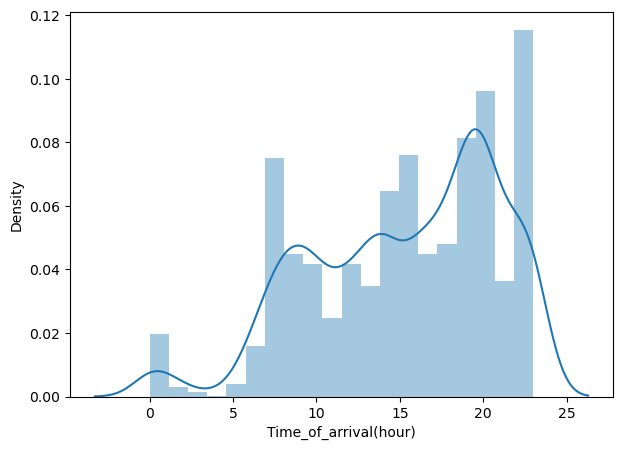



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------




In [136]:
for i in index_n:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(7,5))
    sns.distplot(df[df.columns[i]])
    plt.show()
    print('\n')
    print("-"*125)
    print('\n')
    print("-"*125)
    print('\n')

In [137]:
# we can see some positive skewness present in all numerical column

# Bivariate Analysis:

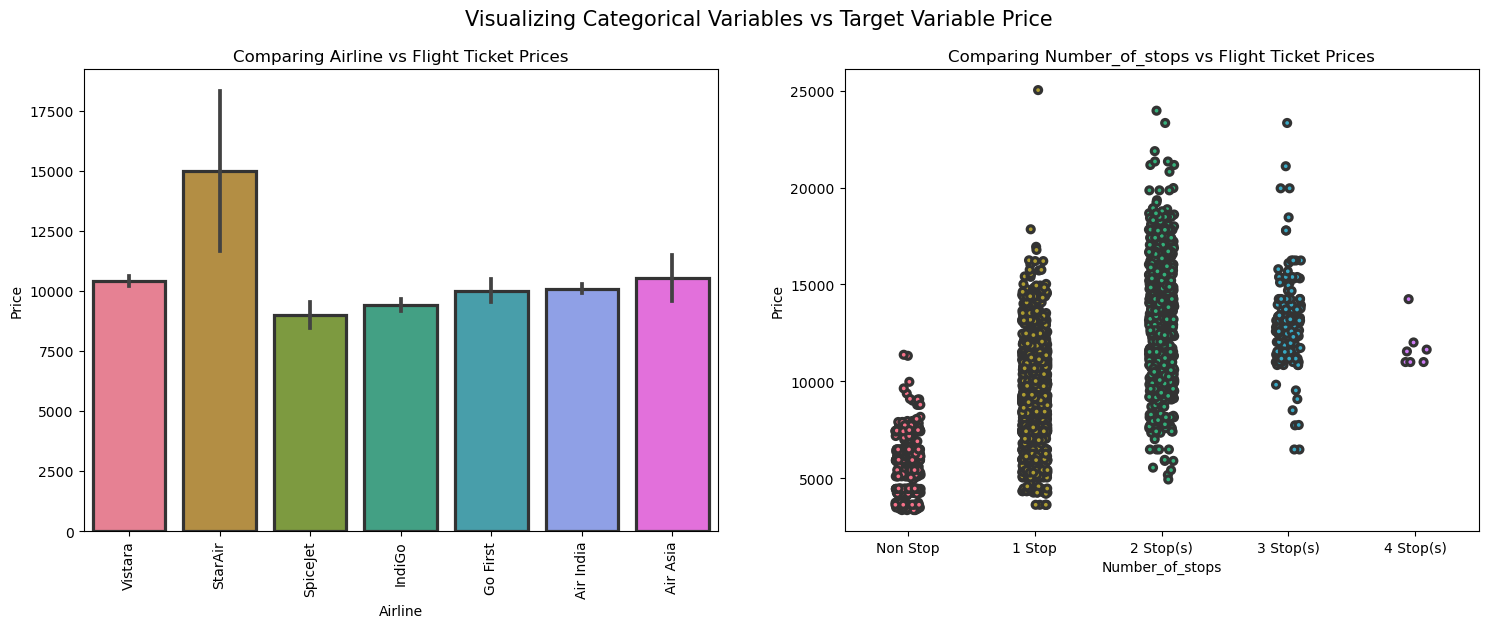

In [138]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing Airline vs Flight Ticket Prices")
sns.barplot(x= df['Airline'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Number_of_stops vs Flight Ticket Prices")
sns.stripplot(x = df['Number_of_stops'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

#Airline vs Price: From the bar plot we can notice "Star Air" and "Vistara" airlines have highest ticket prices compared 
to other airlines.                                                              
#Number_of_stops vs Price: From the strip plot we can notice the flights which have 1 and 2 stops between source and 
destination have highest ticket prices compared to others. The airlines which have 4 stops during the journey have very less ticket price. So we can say as the stops increases, ticket price decreases

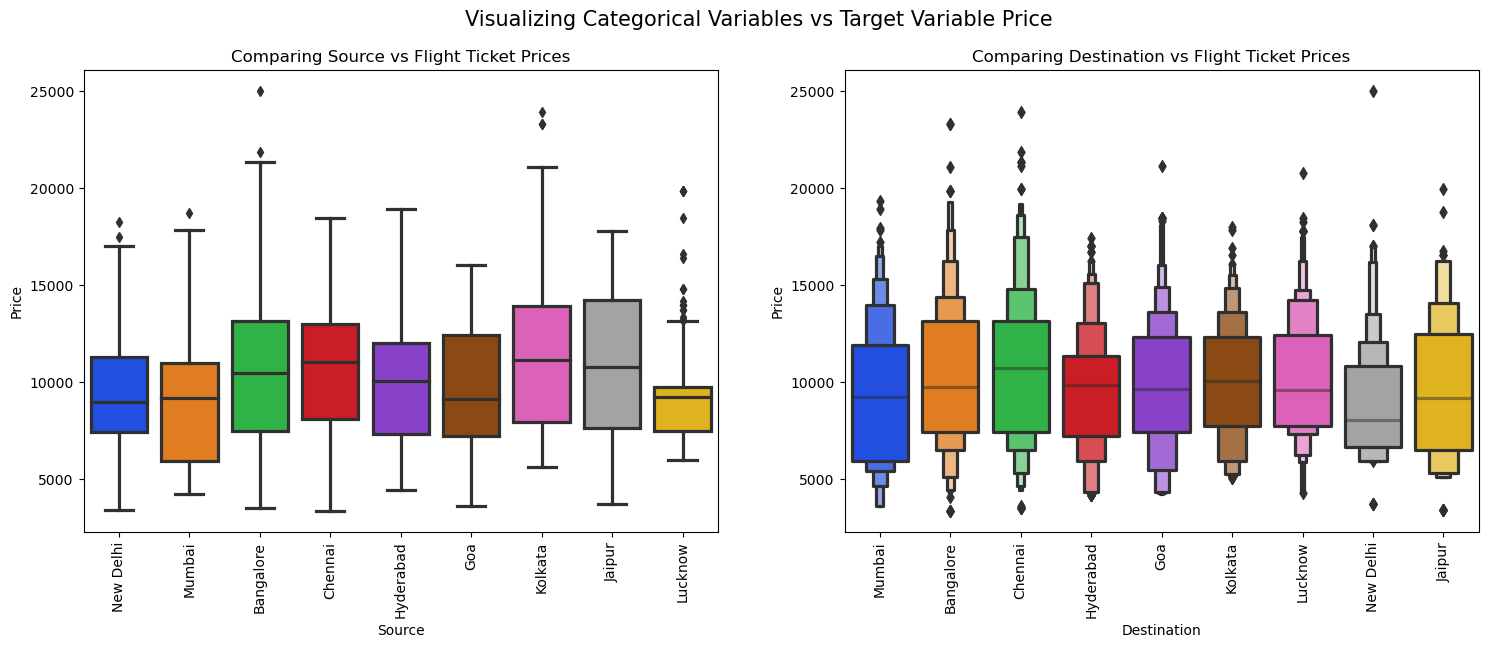

In [139]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= df['Source'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# checking how prices changes in each destination
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = df['Destination'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()

#Source vs Price: From the box plot we can observe the flights from Jaipur are having somewhat higher prices compared to other sources.                             
#Destination vs Price: From the boxen plot we can notice that the flights travelling to Banglore have higher flight ticket prices.

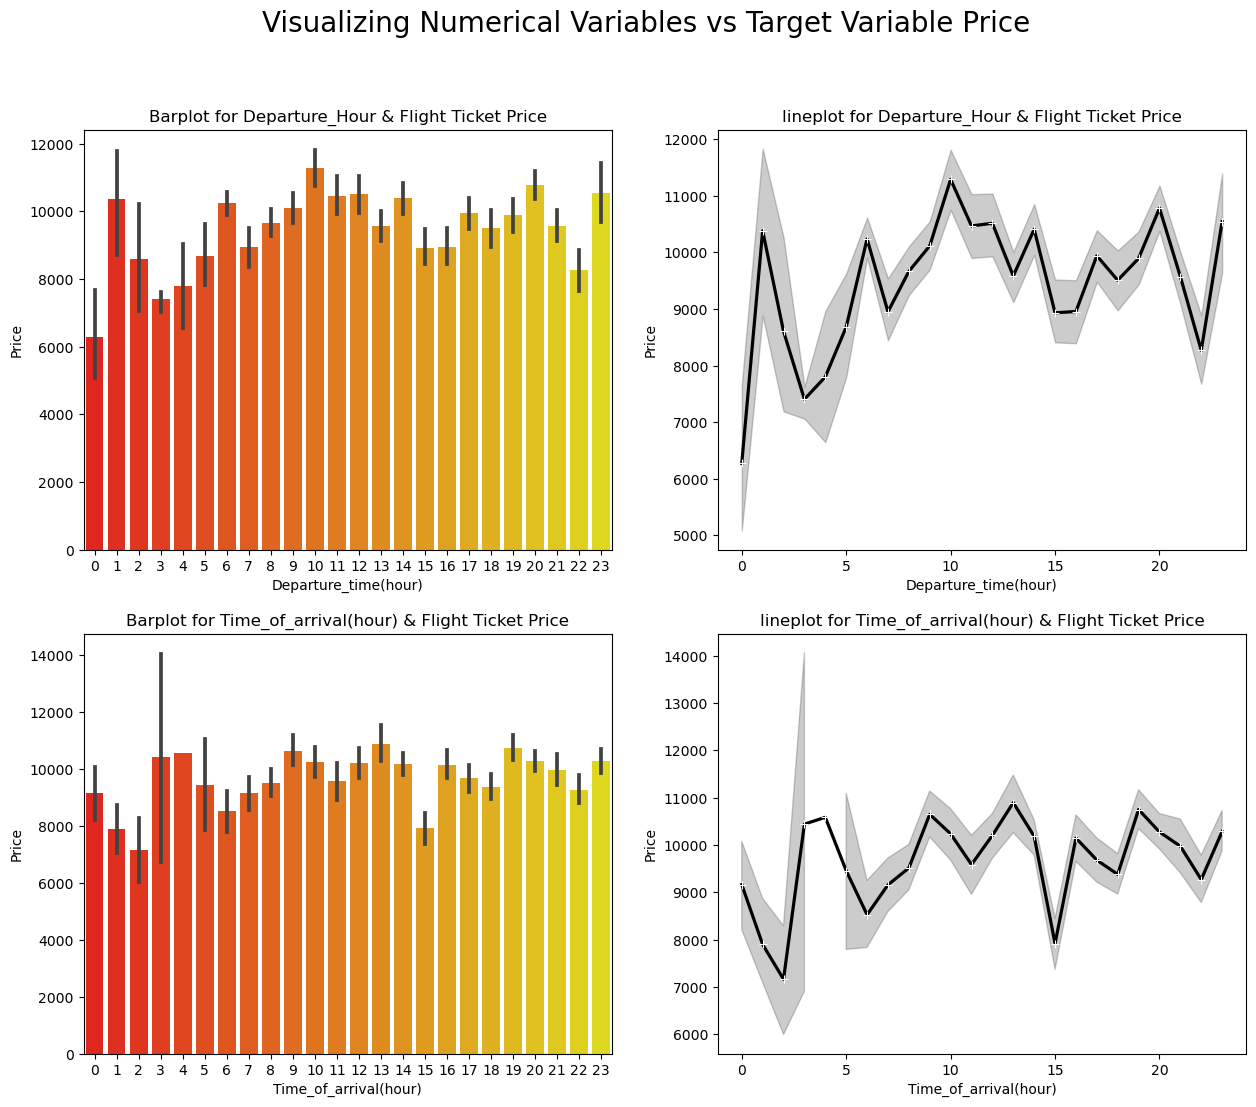

In [145]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= df['Departure_time(hour)'],y= df['Price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = df['Departure_time(hour)'],y= df['Price'],marker="+",color='k',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Time_of_arrival(hour) & Flight Ticket Price")
sns.barplot(x= df['Time_of_arrival(hour)'],y= df['Price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,4)
plt.title("lineplot for Time_of_arrival(hour) & Flight Ticket Price")
sns.lineplot(x = df['Time_of_arrival(hour)'],y= df['Price'],marker="+",color='k',linewidth=2.3)

plt.show()


# Multivariate Analysis:

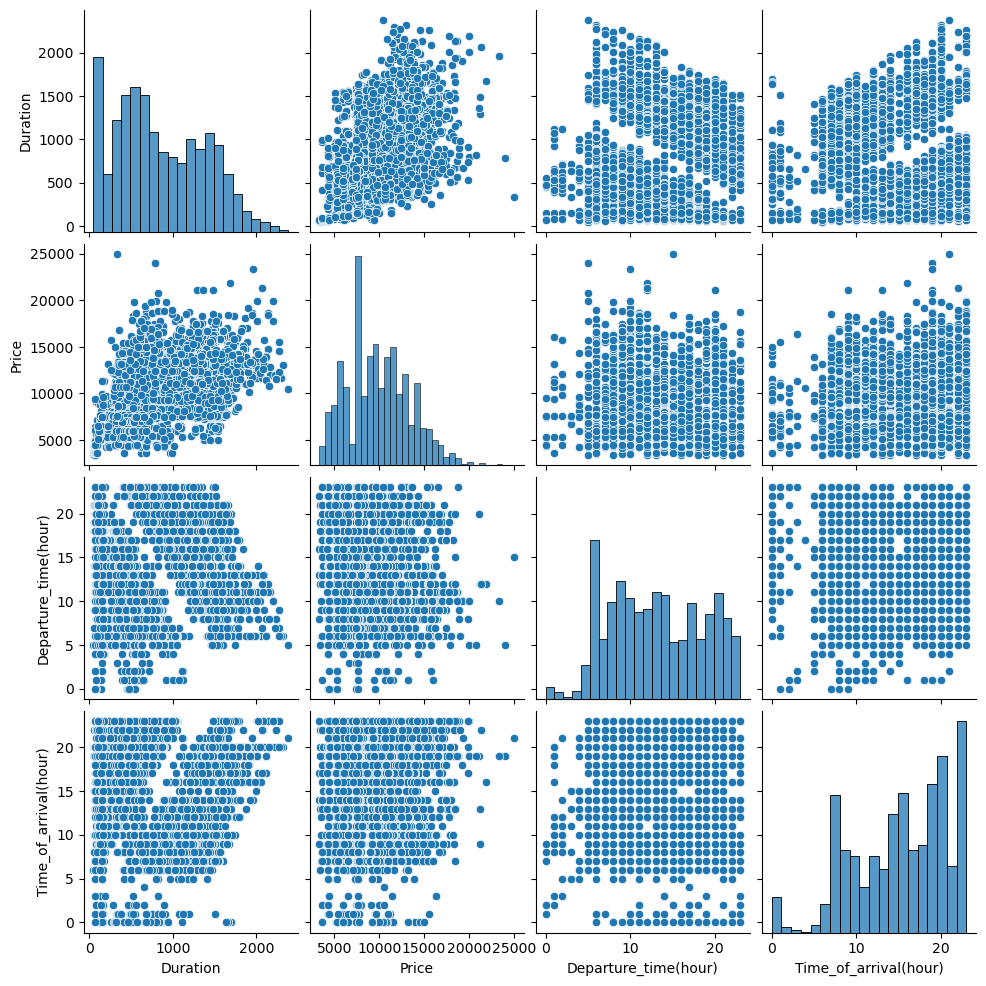

In [38]:
sns.pairplot(df)

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'price'. Here we can observe the relation between the features and label. Most of features are highly correlated with each other. Some of the features have outliers and skewness , will remove them later.

In [39]:
#Checking Correlation
df.corr()

,Duration,Price,Departure_time(hour),Time_of_arrival(hour)
Duration,1.000000,0.565352,0.109326,-0.009001
Price,0.565352,1.000000,-0.000264,0.056985
Departure_time(hour),0.109326,-0.000264,1.000000,0.010091
Time_of_arrival(hour),-0.009001,0.056985,0.010091,1.000000


<AxesSubplot:>

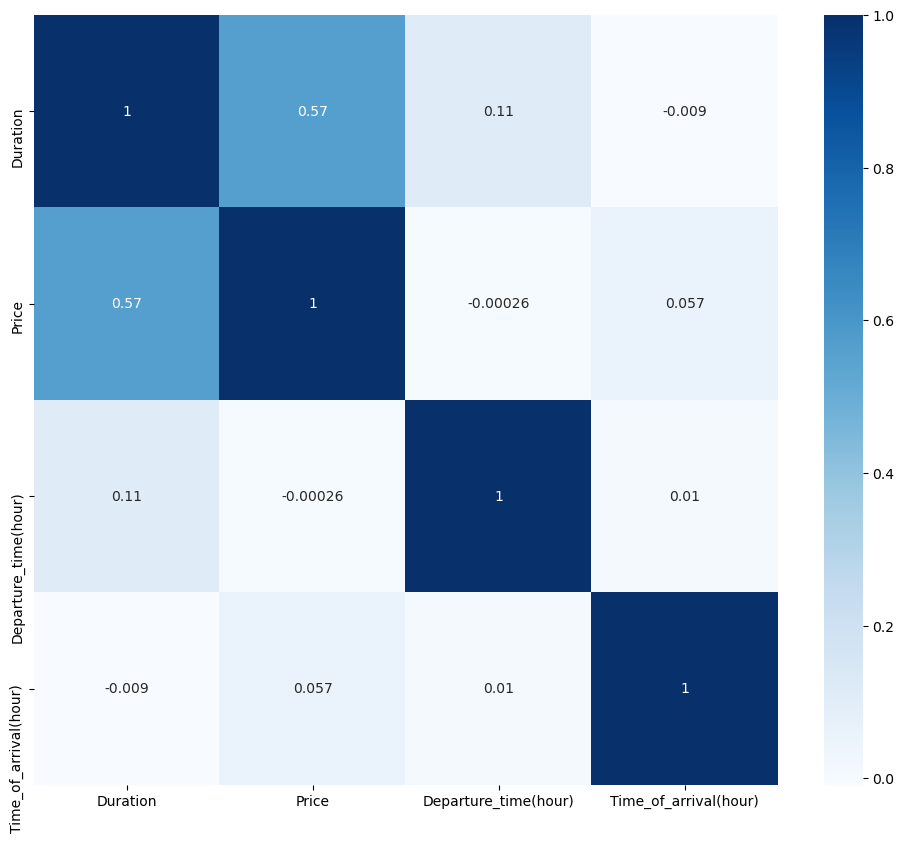

In [40]:
#checking corrleation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [41]:
#Checking Skewness
df.skew()

Duration                 0.362201
Price                    0.421232
Departure_time(hour)     0.084351
Time_of_arrival(hour)   -0.560681
dtype: float64

# Handling Missing Value:

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                3355 non-null   object 
 1   Duration               3355 non-null   int64  
 2   Source                 3355 non-null   object 
 3   Destination            3355 non-null   object 
 4   Meal_availability      3355 non-null   object 
 5   Number_of_stops        3355 non-null   object 
 6   Price                  3355 non-null   float64
 7   Departure_time(hour)   3355 non-null   int64  
 8   Time_of_arrival(hour)  3355 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 236.0+ KB


# Checking Outliers:

In [43]:
df[numerical_columns].nunique().to_frame('unique values')

,unique values
Duration,404
Price,819
Departure_time(hour),24
Time_of_arrival(hour),24


In [44]:
q=[]
for i in numerical_columns:
    if df[i].nunique()>15:
        q.append(i)

In [45]:
q

['Duration', 'Price', 'Departure_time(hour)', 'Time_of_arrival(hour)']

In [46]:
outliers=['Duration', 'Price', 'Departure_time(hour)', 'Time_of_arrival(hour)']

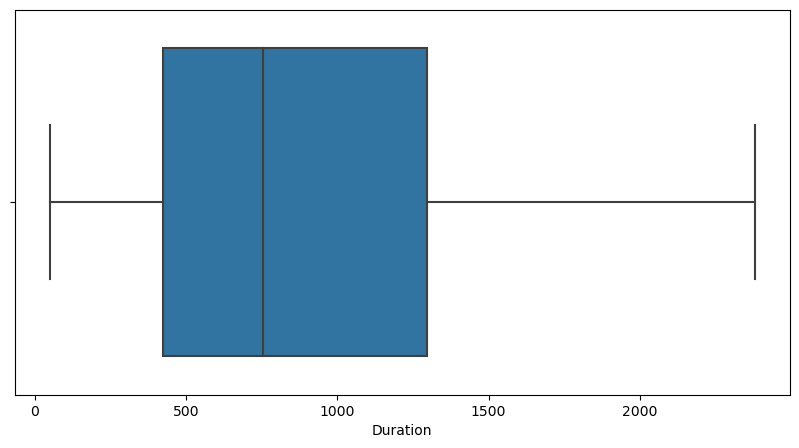



###############################################################################################################################


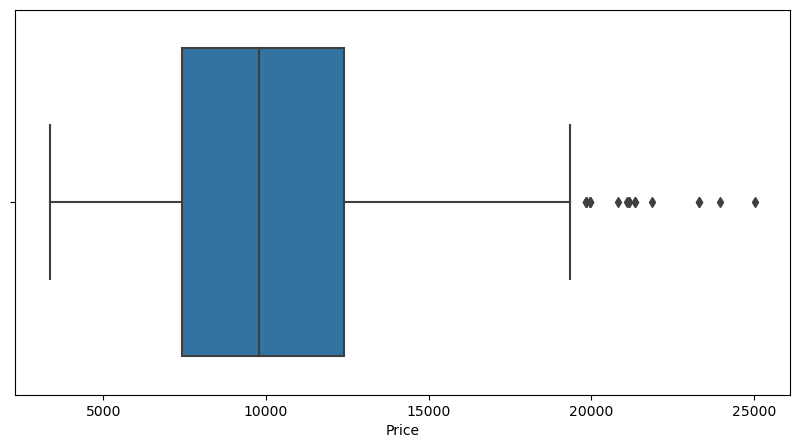



###############################################################################################################################


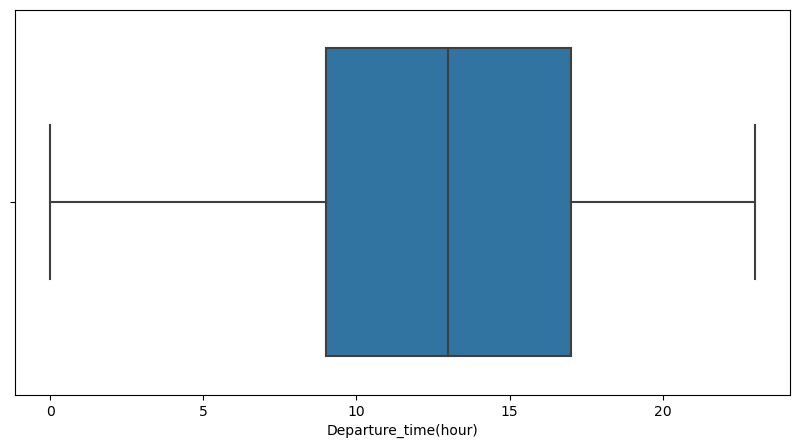



###############################################################################################################################


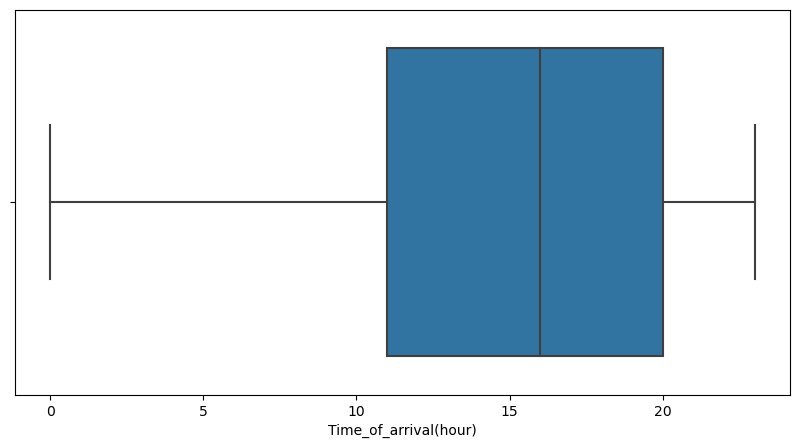



###############################################################################################################################


In [47]:
#Box plot of all Numerical Column
for i in outliers:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*127)

we can see outliers are present only target column.

# Outliers handle by zscore:

In [48]:
#import zscore
from scipy.stats import zscore

In [49]:
z=np.abs(zscore(df[outliers]))
z

array([[1.36887644, 1.16268317, 0.19192353, 0.126646  ],
       [1.36887644, 1.16268317, 0.38147415, 0.30714613],
       [1.36887644, 1.16268317, 1.51877784, 1.39014695],
       ...,
       [0.92340617, 0.20983475, 0.19192353, 0.84864654],
       [0.84758144, 0.20983475, 1.51403202, 0.59535455],
       [0.77175672, 0.20983475, 0.19192353, 1.02914668]])

In [50]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_time(hour),Time_of_arrival(hour)
0,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,14,16
1,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,15,17
2,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,5955.0,21,23
3,Vistara,130,New Delhi,Mumbai,Free Meal,Non Stop,6060.0,19,22
4,Vistara,125,New Delhi,Mumbai,Free Meal,Non Stop,6375.0,9,11
...,...,...,...,...,...,...,...,...,...
3350,Air Asia,1540,Jaipur,Mumbai,Free Meal,1 Stop,9311.0,19,21
3351,Air Asia,310,Jaipur,Chennai,None,1 Stop,10676.0,5,10
3352,Air Asia,365,Jaipur,Chennai,None,1 Stop,10676.0,14,20
3353,Air Asia,405,Jaipur,Chennai,None,1 Stop,10676.0,5,12


In [51]:
print(df.shape)
print(df_new.shape)

(3355, 9)
(3344, 9)


In [52]:
percentage_of_dataloss=((3355-3344)/3355)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 0.32786885245901637


# LabelEncoding:

In [53]:
# checking for categorical columns
categorical_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Meal_availability', 'Number_of_stops']


In [54]:
list_c=['Airline', 'Source', 'Destination', 'Meal_availability', 'Number_of_stops']

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_c:
    df_new[i]=le.fit_transform(df_new[i]).astype(int)

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 0 to 3354
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                3344 non-null   int32  
 1   Duration               3344 non-null   int64  
 2   Source                 3344 non-null   int32  
 3   Destination            3344 non-null   int32  
 4   Meal_availability      3344 non-null   int32  
 5   Number_of_stops        3344 non-null   int32  
 6   Price                  3344 non-null   float64
 7   Departure_time(hour)   3344 non-null   int64  
 8   Time_of_arrival(hour)  3344 non-null   int64  
dtypes: float64(1), int32(5), int64(3)
memory usage: 195.9 KB


now all the columns are numerical type and no null values are in the dataframe

# Dividing data in features and vectors:

In [57]:
df_new

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_time(hour),Time_of_arrival(hour)
0,6,130,8,7,0,4,5955.0,14,16
1,6,130,8,7,0,4,5955.0,15,17
2,6,130,8,7,0,4,5955.0,21,23
3,6,130,8,7,0,4,6060.0,19,22
4,6,125,8,7,0,4,6375.0,9,11
...,...,...,...,...,...,...,...,...,...
3350,0,1540,4,7,0,0,9311.0,19,21
3351,0,310,4,1,1,0,10676.0,5,10
3352,0,365,4,1,1,0,10676.0,14,20
3353,0,405,4,1,1,0,10676.0,5,12


In [58]:
x=df_new.drop("Price",axis=1) #Independent variable
y=df_new.iloc[:,-3] #Dependent variable

In [59]:
x

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Departure_time(hour),Time_of_arrival(hour)
0,6,130,8,7,0,4,14,16
1,6,130,8,7,0,4,15,17
2,6,130,8,7,0,4,21,23
3,6,130,8,7,0,4,19,22
4,6,125,8,7,0,4,9,11
...,...,...,...,...,...,...,...,...
3350,0,1540,4,7,0,0,19,21
3351,0,310,4,1,1,0,5,10
3352,0,365,4,1,1,0,14,20
3353,0,405,4,1,1,0,5,12


In [60]:
y

0        5955.0
1        5955.0
2        5955.0
3        6060.0
4        6375.0
         ...   
3350     9311.0
3351    10676.0
3352    10676.0
3353    10676.0
3354    10676.0
Name: Price, Length: 3344, dtype: float64

# Checking VIF score:

In [61]:
# checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Price', 'Departure_time(hour)', 'Time_of_arrival(hour)']


In [62]:
p=x[['Duration','Departure_time(hour)', 'Time_of_arrival(hour)']]

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [64]:
#checking VIF score
vif_clac()

   VIF Factor               features
0    3.228240               Duration
1    4.919541   Departure_time(hour)
2    4.652719  Time_of_arrival(hour)


In [65]:
# VIF score is under control

# Transforming data to remove skewness:

In [66]:
#checking skewness
x.skew()

Airline                  0.545665
Duration                 0.362083
Source                   0.071556
Destination             -0.050122
Meal_availability        0.527197
Number_of_stops          1.552256
Departure_time(hour)     0.082925
Time_of_arrival(hour)   -0.558253
dtype: float64

we can see some columns have heavy skewness

In [67]:
#we use power transformation(method= yeo-johnson) method to remove skewness of the columns

In [68]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.36817561, -1.63286177,  1.32954532, ...,  1.61546224,
         0.23495374,  0.06389764],
       [ 1.36817561, -1.63286177,  1.32954532, ...,  1.61546224,
         0.41700162,  0.25858778],
       [ 1.36817561, -1.63286177,  1.32954532, ...,  1.61546224,
         1.45760189,  1.50749976],
       ...,
       [-2.34424361, -0.86749718,  0.14808545, ..., -0.87904525,
         0.23495374,  0.86645742],
       [-2.34424361, -0.76446534,  0.14808545, ..., -0.87904525,
        -1.58477299, -0.6710983 ],
       [-2.34424361, -0.66610001,  0.14808545, ..., -0.87904525,
         0.23495374,  1.07659716]])

In [69]:
#print skewness after power transform
df_new1=pd.DataFrame(x,columns=df_new.drop("Price",axis=1).columns)
df_new1.skew()

Airline                  0.007301
Duration                -0.152552
Source                  -0.195283
Destination             -0.226589
Meal_availability        0.527197
Number_of_stops          0.395321
Departure_time(hour)    -0.085944
Time_of_arrival(hour)   -0.275968
dtype: float64

In [70]:
#Now skewness is under control

In [71]:
#ploting distribution curve of all columns

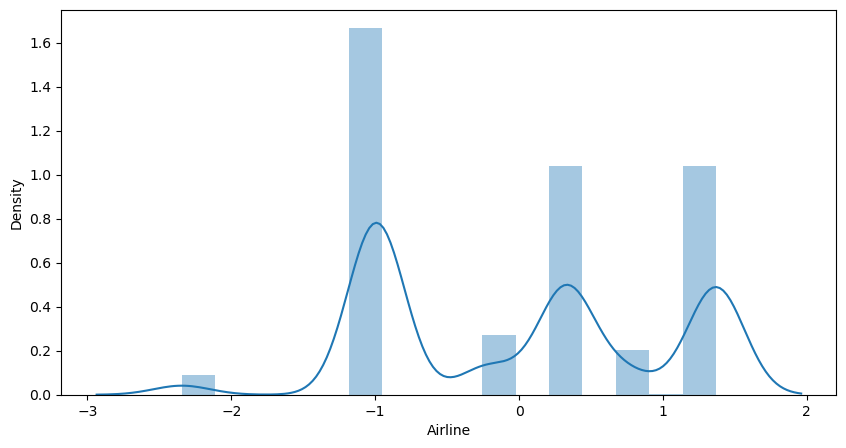

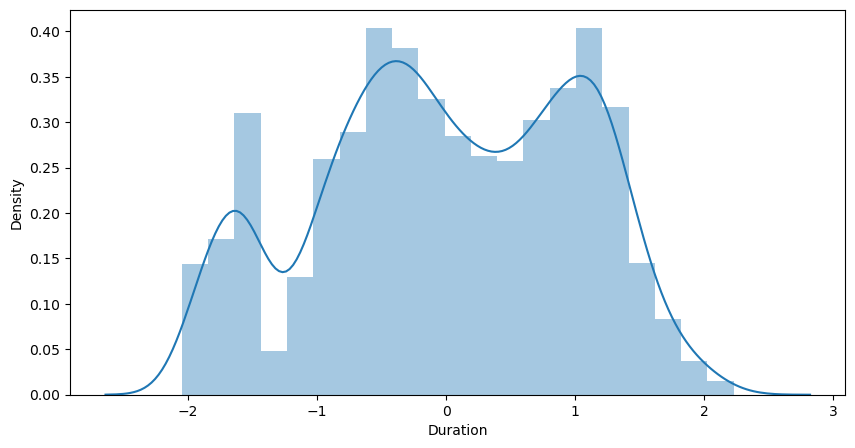

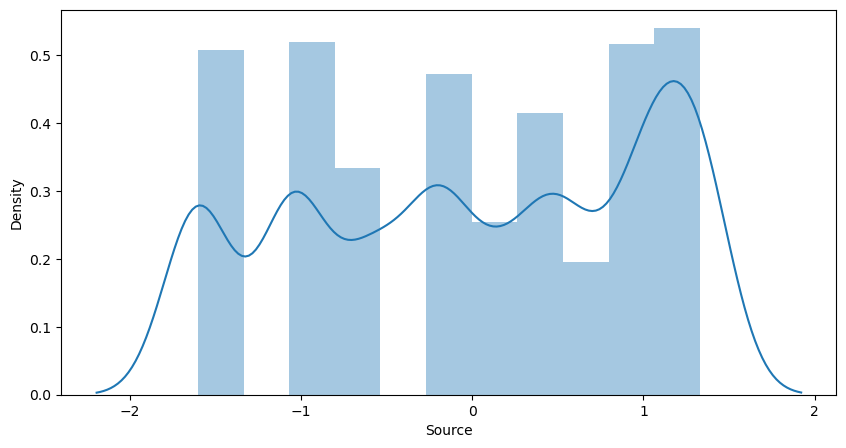

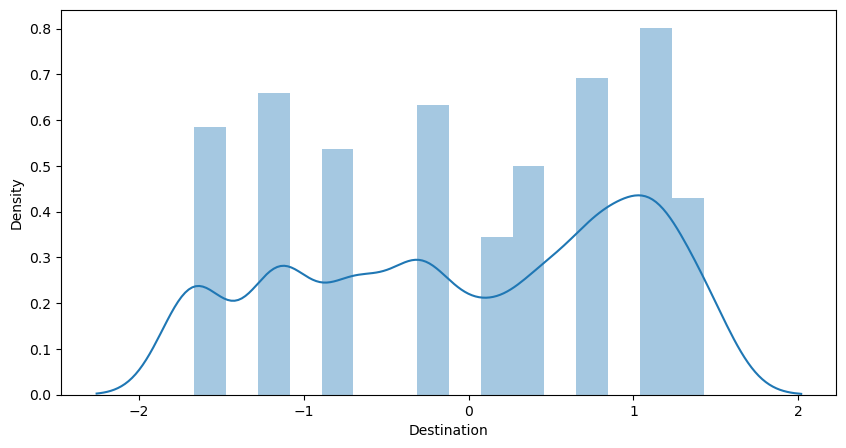

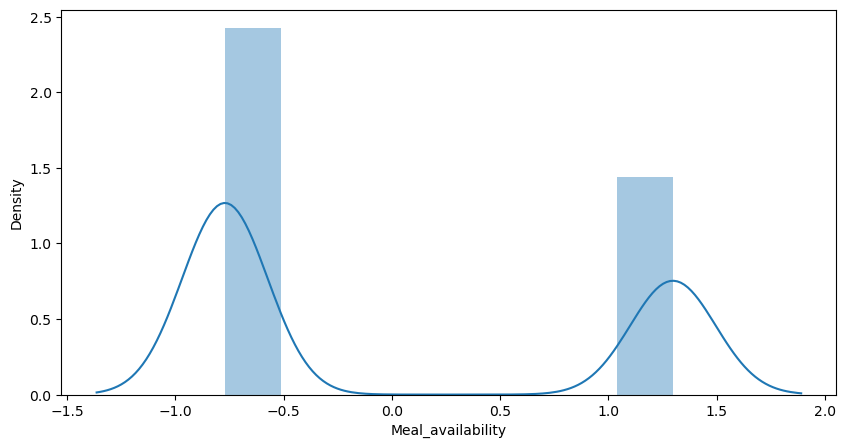

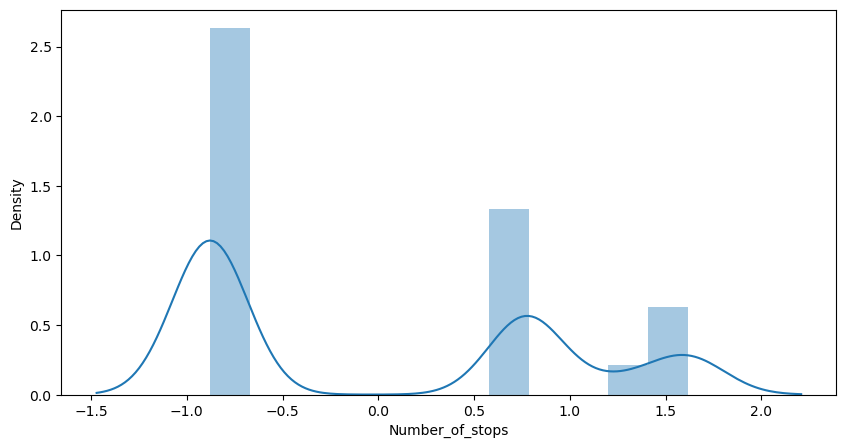

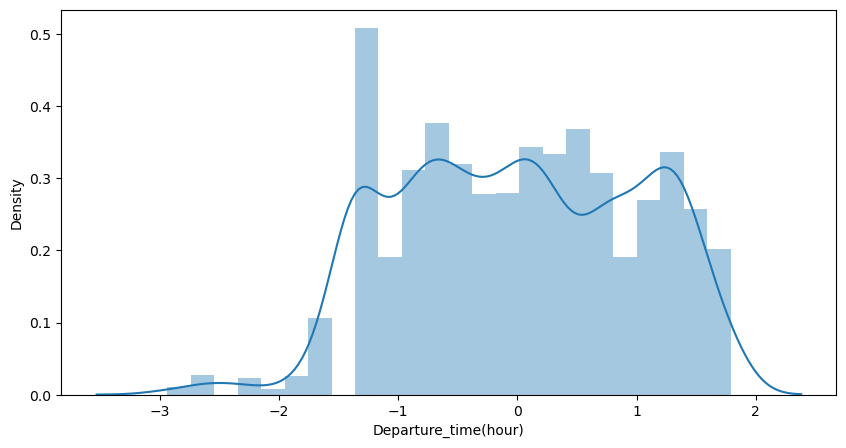

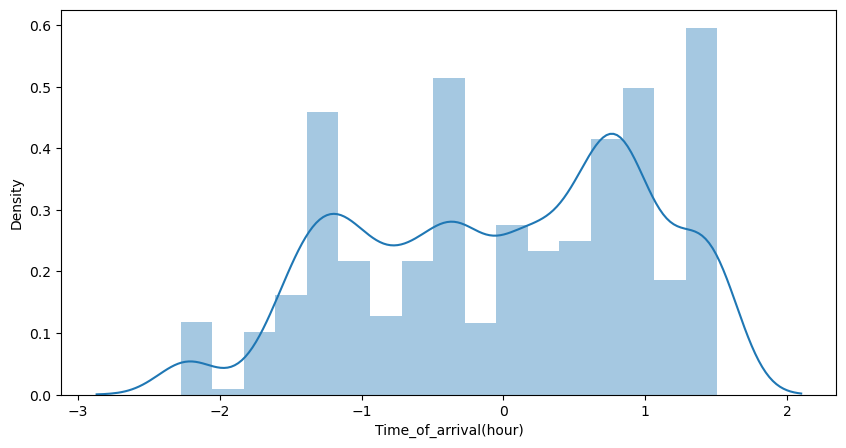

In [72]:
for i in range(8):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])    
    plt.show()

skewness has been removed from all numerical columns.

In [73]:
#standardizing the data

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.36817561, -1.63286177,  1.32954532, ...,  1.61546224,
         0.23495374,  0.06389764],
       [ 1.36817561, -1.63286177,  1.32954532, ...,  1.61546224,
         0.41700162,  0.25858778],
       [ 1.36817561, -1.63286177,  1.32954532, ...,  1.61546224,
         1.45760189,  1.50749976],
       ...,
       [-2.34424361, -0.86749718,  0.14808545, ..., -0.87904525,
         0.23495374,  0.86645742],
       [-2.34424361, -0.76446534,  0.14808545, ..., -0.87904525,
        -1.58477299, -0.6710983 ],
       [-2.34424361, -0.66610001,  0.14808545, ..., -0.87904525,
         0.23495374,  1.07659716]])

Now our Data is Ready for Model Building

# Model Building:

In [75]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [76]:
x.shape

(3344, 8)

In [77]:
lm=LinearRegression()
m=0
for i in range (0,5000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 0.516128244239533 at random state= 4503


we find the best random state state at 4503.we will creat our train_test_split using this random state

In [78]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=4503)

In [79]:
#cheking shape of all variable
print("train_x shape =",train_x.shape)
print("test_x shape =",test_x.shape)
print("train_y shape =",train_y.shape)
print("test_y shape =",test_y.shape)

train_x shape = (2340, 8)
test_x shape = (1004, 8)
train_y shape = (2340,)
test_y shape = (1004,)


In [80]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

0.516128244239533

In [81]:
lm.coef_

array([  -36.78844247,  1376.20533681,  -227.39004747,  -284.49312488,
       -1295.95527629,   427.82072014,  -267.93937709,   167.3398243 ])

In [82]:
lm.intercept_

9857.247429454656

# Error of Llinear regression Model on our dataset

In [83]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  2002.7855091820804
Mean Squared Error:  6577432.196385294
Root Mean Squared Error:  2564.650501800449


In [84]:
#checking r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

0.4077571071211813


In [85]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 0.4644146673440924


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

In [88]:
model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [89]:
for i in model:
    p=i
    p.fit(train_x,train_y)
    print("accuracy score of",i,"is =",p.score(train_x,train_y))
    
    print("\n")
    print("#"*50)

accuracy score of LinearRegression() is = 0.516128244239533


##################################################
accuracy score of Ridge() is = 0.5161281985463352


##################################################
accuracy score of Lasso() is = 0.5161275338654971


##################################################
accuracy score of DecisionTreeRegressor() is = 0.9996099397519521


##################################################
accuracy score of SVR() is = 0.04204080813688338


##################################################
accuracy score of KNeighborsRegressor() is = 0.769643011674876


##################################################
accuracy score of RandomForestRegressor() is = 0.9679537153492999


##################################################
accuracy score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
   

# Checking Cross Val Score:

In [90]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LinearRegression() is = 0.4713649080269286
cross validation score of Ridge() is = 0.4714287970153943
cross validation score of Lasso() is = 0.4717475825611579
cross validation score of DecisionTreeRegressor() is = 0.2706875326703603
cross validation score of SVR() is = 0.019793552619179255
cross validation score of KNeighborsRegressor() is = 0.4800749037047642
cross validation score of RandomForestRegressor() is = 0.6307626129055206
cross validation score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
     

we get best cross val score from GradientBoostingRegressor for CV=3

# Parameter Tuning:

In [91]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[3,4,5,6,7,8],'learning_rate':[1,0.1,0.001,0.0001]}
gcv1=GridSearchCV(GradientBoostingRegressor(),parameters,cv=3,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'learning_rate': 1, 'max_depth': 3, 'max_features': 'auto'}

In [92]:
gcv1.best_estimator_

GradientBoostingRegressor(learning_rate=1, max_features='auto')

In [93]:
gcv1.best_estimator_.fit(test_x,test_y)
print("Test Accuracy=",gcv1.best_estimator_.score(test_x,test_y))

Test Accuracy= 0.9400726358740482


accuracy score has increased after parameter tuning.Now we will create final model with this parameter.

# Creating Final Model:

In [94]:
final_model=GradientBoostingRegressor(learning_rate=1, max_features='auto')

In [95]:
final_model.fit(test_x,test_y)
pred=final_model.predict(test_x)
print("Test Accuracy=",final_model.score(test_x,test_y))

Test Accuracy= 0.9400726358740482


In [98]:
final_model.fit(train_x,train_y)
pred1=final_model.predict(train_x)
print("Train Accuracy=",final_model.score(train_x,train_y))

Train Accuracy= 0.9366545656145541


since difference between train accuracy and test accuracy is very less ,our model is not overfit or underfit.

In [99]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=final_model.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  1487.5981830920437
Mean Squared Error:  4215961.293204292
Root Mean Squared Error:  2053.2806172572446


,Predicted,Original
1266,9895.012603,11111.0
2515,11425.797839,11409.0
1483,10367.228816,9546.0
3053,11097.474836,12474.0
284,14969.015765,14524.0
...,...,...
1307,11580.420673,11409.0
1050,8162.298036,7845.0
449,14521.847964,14388.0
2430,9083.155770,9064.0


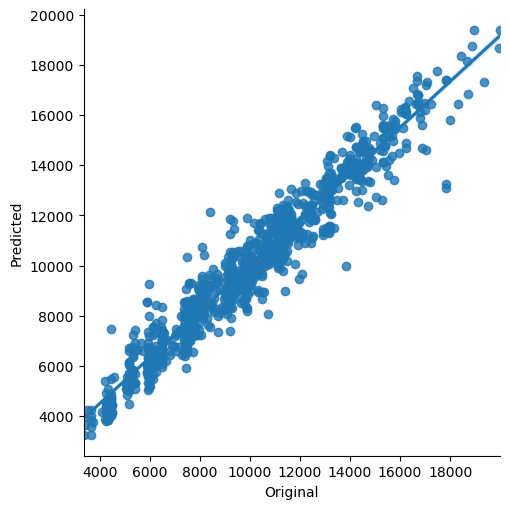

In [100]:
MLdf= pd.DataFrame({'Original':test_y, 'Predicted':pred},columns=["Predicted","Original"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf

we can see from the graph the actual price and predicted price are almost same.so our model performance is good

In [101]:
#Save the final model                                                                      
import joblib 
#joblib.dump(final_model,'Flight price prediction Model.pkl')

# --------------------------------------------THANK YOU-------------------------------------------------